# 📁 Netflix Dataset Overview

## 🔍 Description

This dataset contains information about the movies and TV shows available on Netflix as of 2021. It includes content from as early as **1925** and captures additions up to **2021**. The dataset has been curated and cleaned from its original version to make it more analysis-ready.

Netflix, being one of the largest global streaming platforms, hosts a diverse library of international content across multiple genres, languages, and regions. This dataset provides an excellent opportunity to explore trends in content distribution, regional contributions, genre popularity, and temporal patterns.

## 🧾 Dataset Features

Here are the key columns included in the dataset:

- **show_id**: Unique identifier for each show.
- **type**: Indicates whether the content is a "Movie" or "TV Show".
- **title**: Name of the movie or show.
- **director**: Name(s) of the director(s), if available.
- **cast**: Main actors/actresses featured in the content.
- **country**: Country of origin of the content.
- **date_added**: The date the content was added to Netflix.
- **release_year**: The original release year of the content.
- **rating**: Audience rating (e.g., PG, TV-MA).
- **duration**: For movies, it's runtime in minutes; for shows, the number of seasons.
- **listed_in**: Categories or genres assigned to the content.
- **description**: A short summary of the content.

## 🎯 Purpose

This project is aimed at performing:
1. **Data Cleaning** using Python (Pandas)
2. **Exploratory Data Analysis (EDA)** to extract meaningful patterns
3. **Visualization** (optional) using Tableau for presenting insights

Through this analysis, we aim to answer questions about content types, geographical contributions, genre distribution, content duration, and yearly trends in Netflix additions.

---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Netflix Data

In [2]:
df = pd.read_csv('netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.shape

(8790, 10)

# 📊 Netflix Dataset Analysis Plan

## 🧹 Data Cleaning Questions

1. **Missing Values**
   - Which columns have null values?
   - How should you handle them? (drop, impute, or flag?)

2. **Duplicate Rows**
   - Are there any duplicate rows in the dataset?
   - If so, drop them and check the shape again.

3. **Whitespace & Inconsistencies**
   - Are there extra whitespaces in string columns (e.g., `title`, `director`, `country`)?
   - Can you make all categorical columns lowercase for uniformity?

4. **Unnecessary Columns**
   - Is `show_id` needed for your analysis and dashboard? If not, consider dropping it.

5. **Splitting Columns**
   - Can you split `listed_in` (genre list) into individual genre entries?
   - Can you split `duration` into `duration_int` and `duration_type` (minutes/seasons)?

6. **Date Formats**
   - Is `date_added` in datetime format? If not, convert it.
   - Create a new column `year_added` from `date_added`.



In [5]:
# Checking Missing Values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
# Checking Duplicated Rows

df.duplicated().sum()

0

In [7]:
# droping Unnecessary Columns

df.drop(columns=['show_id'], inplace= True)

In [8]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [10]:
# Rename columns

df.rename(columns={'listed_in': 'genres'}, inplace=True)


In [11]:
# Date Format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [12]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   genres        8790 non-null   object        
 9   year_added    8790 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 652.5+ KB


In [14]:
# Define a function to extract movie minutes or TV show seasons
def split_duration(row):
    if pd.isnull(row['duration']):
        return pd.NA, pd.NA
    parts = row['duration'].lower().split()
    if len(parts) >= 2:
        number = parts[0]
        unit = parts[1]
        if row['type'].lower() == 'movie' and 'min' in unit:
            return int(number), pd.NA
        elif row['type'].lower() == 'tv show' and 'season' in unit:
            return pd.NA, int(number)
    return pd.NA, pd.NA

In [15]:
# Apply the function to your dataframe
df[['movie_duration_mins', 'tvshow_duration_seasons']] = df.apply(split_duration, axis=1, result_type='expand')

In [16]:
# Convert movie_duration_mins → int, allowing NaN (nullable integer)
df['movie_duration_mins'] = pd.to_numeric(df['movie_duration_mins'], errors='coerce').astype('Int64')

# Convert tvshow_duration_seasons → int, allowing NaN (nullable integer)
df['tvshow_duration_seasons'] = pd.to_numeric(df['tvshow_duration_seasons'], errors='coerce').astype('Int64')


In [17]:
# Preview result
df.head()

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,90,<NA>
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,<NA>,1
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,91,<NA>
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,125,<NA>


In [71]:
df.drop(columns=['duration'], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   type                     8790 non-null   object        
 1   title                    8790 non-null   object        
 2   director                 8790 non-null   object        
 3   country                  8790 non-null   object        
 4   date_added               8790 non-null   datetime64[ns]
 5   release_year             8790 non-null   int32         
 6   rating                   8790 non-null   object        
 7   genres                   8790 non-null   object        
 8   year_added               8790 non-null   int32         
 9   movie_duration_mins      6126 non-null   Int64         
 10  tvshow_duration_seasons  2664 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), int32(2), object(6)
memory usage: 704.0+ KB


---

## 📊 Exploratory Data Analysis (EDA) Questions

1. **General Overview**
   - What is the total number of movies vs TV shows?
   - What is the earliest and latest year of content release?

2. **Country Insights**
   - Which 10 countries have the most Netflix content?
   - What are the top 5 countries for movies? For TV shows?

3. **Temporal Patterns**
   - How has the number of Netflix additions changed over time (per year)?
   - Is there a trend of adding more movies or TV shows?

4. **Genre/Category Analysis**
   - What are the most common genres across all content?
   - What are the top 5 genres specifically for movies vs TV shows?

5. **Ratings**
   - What are the most common content ratings (TV-MA, PG, etc.)?
   - Is there any trend in ratings across years?

6. **Duration Distribution**
   - What is the average duration of movies?
   - What is the average number of seasons for TV shows?

7. **Director Insights**
   - Who are the top 10 most frequent directors?
   - Which director has the most TV shows on Netflix?


# 1. General Overview

# 1.1 Movies vs TV Shows — 📈 Pie Plot

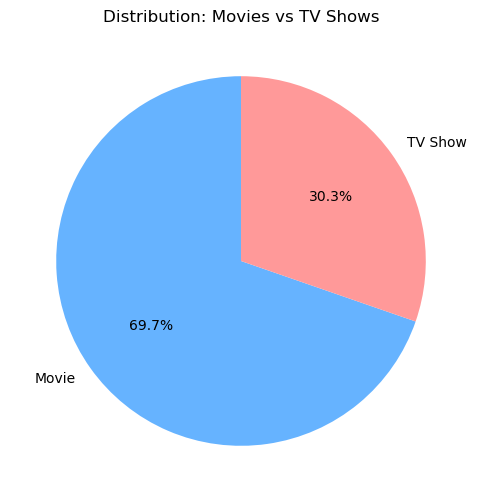

In [19]:
# Pie plot for content type
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution: Movies vs TV Shows')
plt.ylabel('')
plt.show()

📝 Conclusion: This shows what proportion of the Netflix catalog is made up of movies vs TV shows. If movies dominate, Netflix leans toward single-time content; if TV shows dominate, it indicates a preference for episodic engagement.

# 1.2 Earliest and Latest Year of Content Release — 📊 Bar Plot

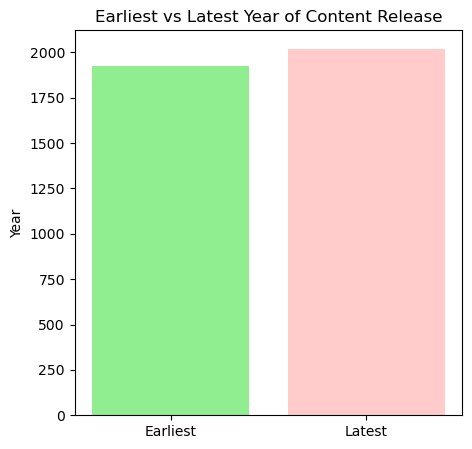

In [20]:
# Cleaning the 'release_year' column if necessary
df['release_year'] = df['release_year'].astype(int)

earliest = df['release_year'].min()
latest = df['release_year'].max()

plt.figure(figsize=(5, 5))
plt.bar(x=['Earliest', 'Latest'], height=[earliest, latest], color=['#90ee90', '#ffcccb'])
plt.title('Earliest vs Latest Year of Content Release')
plt.ylabel('Year')
plt.show()


📝 Conclusion: This shows the year range in which Netflix has content. It gives context on how "classic" or modern the library is.

# 2. Country Insights

# 2.1 Top 10 Countries with Most Content — 📊 Bar Plot

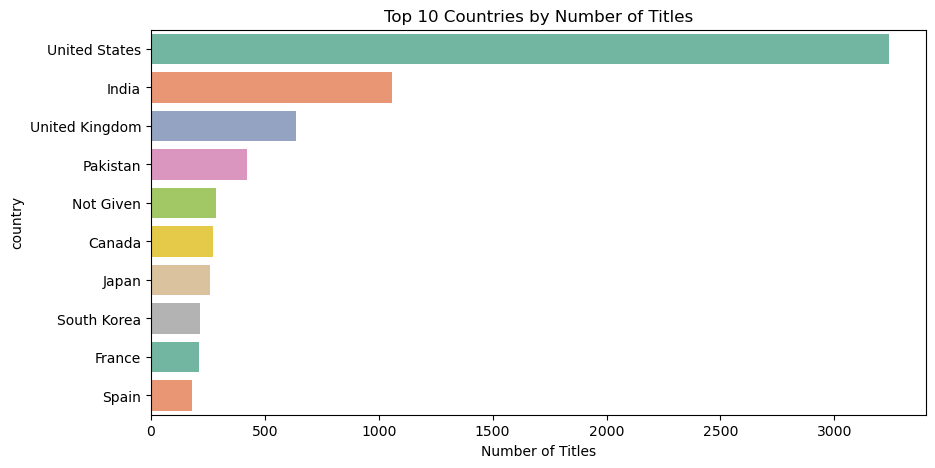

In [21]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, dodge=False, palette='Set2', legend=False)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()


📝 Conclusion: Shows Netflix’s global footprint. Countries like the US and India often dominate, showing regional focus and language preferences.

# 2.2 Top 5 Countries: Movies vs TV Shows — 📊 Count Plot

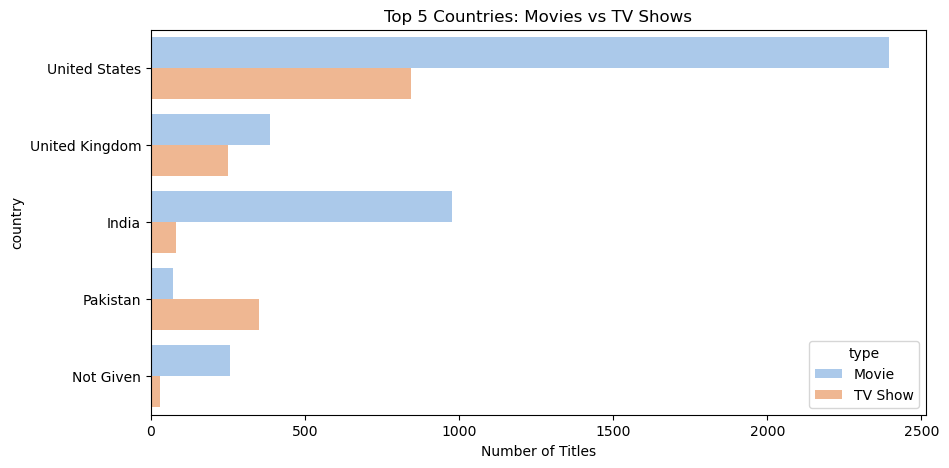

In [22]:
# Get the top 5 country names
top5_countries = df['country'].value_counts().head(5).index

# Filter the dataframe where country is in top5_countries
top5_df = df[df['country'].isin(top5_countries)]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=top5_df, y='country', hue='type', palette='pastel')
plt.title('Top 5 Countries: Movies vs TV Shows')
plt.xlabel('Number of Titles')
plt.show()


📝 Conclusion: Visualizes which countries are producing more movies or TV shows. Some countries may show a stronger leaning toward one type of content.

## 3. Temporal Patterns

## 3.1 Netflix Additions Over Time — 📈 Line Plot

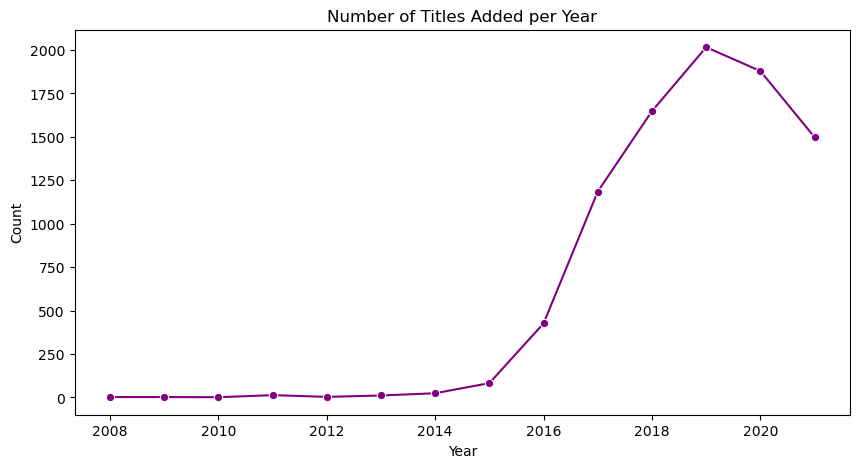

In [23]:
additions_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=additions_per_year.index, y=additions_per_year.values, marker='o', color='purple')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


📝 Conclusion: Helps identify Netflix’s growth periods. A spike post-2015 often shows Netflix's global expansion.



## 3.2 Movies vs TV Shows Trend — 📈 Line Plot

In [24]:
trend = df.groupby(['year_added', 'type']).size()

In [25]:
trend

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         3
2013        Movie         6
            TV Show       5
2014        Movie        19
            TV Show       5
2015        Movie        56
            TV Show      26
2016        Movie       251
            TV Show     175
2017        Movie       836
            TV Show     349
2018        Movie      1237
            TV Show     411
2019        Movie      1424
            TV Show     592
2020        Movie      1284
            TV Show     595
2021        Movie       993
            TV Show     505
dtype: int64

In [26]:
trend = trend.unstack()

In [27]:
trend

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0


In [28]:
trend.fillna(0)

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0


<Figure size 1000x500 with 0 Axes>

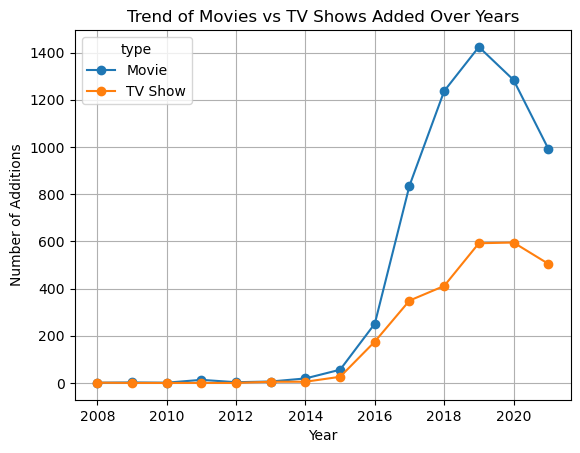

In [29]:
trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
trend.plot(kind='line', marker='o')
plt.title('Trend of Movies vs TV Shows Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()


📝 Conclusion: Shows if Netflix is focusing more on movies or TV shows recently.

## 4. Genre/Category Analysis

# 4.1 Most Common Genres — 📊 Bar Plot

In [30]:
genres = df['genres'].str.split(', ')

In [31]:
genres

0                                         [Documentaries]
1       [Crime TV Shows, International TV Shows, TV Ac...
2                    [TV Dramas, TV Horror, TV Mysteries]
3                    [Children & Family Movies, Comedies]
4       [Dramas, Independent Movies, International Mov...
                              ...                        
8785                  [International TV Shows, TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows, Romantic TV Shows, TV...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: genres, Length: 8790, dtype: object

In [32]:
genres = df['genres'].str.split(', ', expand=True)

In [33]:
genres

,0,1,2
0,Documentaries,None,None
1,Crime TV Shows,International TV Shows,TV Action & Adventure
2,TV Dramas,TV Horror,TV Mysteries
3,Children & Family Movies,Comedies,None
4,Dramas,Independent Movies,International Movies
...,...,...,...
8785,International TV Shows,TV Dramas,None
8786,Kids' TV,None,None
8787,International TV Shows,Romantic TV Shows,TV Dramas
8788,Kids' TV,None,None


In [34]:
genres = genres.stack()

In [35]:
genres

0     0             Documentaries
1     0            Crime TV Shows
      1    International TV Shows
      2     TV Action & Adventure
2     0                 TV Dramas
                    ...          
8787  0    International TV Shows
      1         Romantic TV Shows
      2                 TV Dramas
8788  0                  Kids' TV
8789  0                  Kids' TV
Length: 19294, dtype: object

In [36]:
genres.value_counts().head(10)

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_3776\2570943930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='coolwarm')


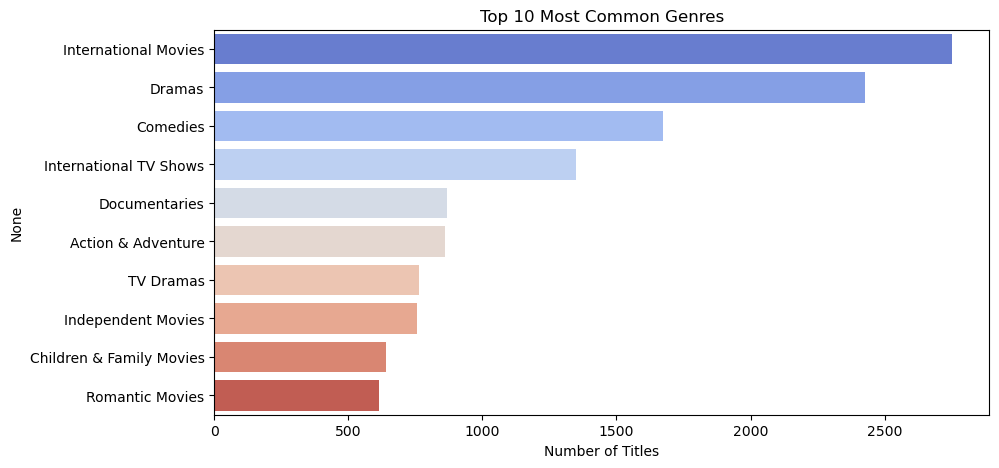

In [37]:
genres = df['genres'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=genres.values, y=genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Titles')
plt.show()


📝 Conclusion: Reveals user preferences; genres like “Drama” and “Comedies” usually dominate.

# 4.2 🥧 Top 5 Genres for Movies – Pie Chart

In [38]:
df[df['type'] == 'Movie']

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,90,<NA>
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,91,<NA>
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,125,<NA>
6,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,104,<NA>
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,87,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
8702,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies",2018,103,<NA>
8707,Movie,The Darkest Dawn,Not Given,United Kingdom,2018-06-23,2016,TV-MA,75 min,"Action & Adventure, Independent Movies, Intern...",2018,75,<NA>
8716,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies",2019,136,<NA>
8763,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies",2017,89,<NA>


In [39]:
movie_genres = df[df['type'] == 'Movie']

In [40]:
movie_genres = movie_genres.assign(genre=movie_genres['genres'].str.split(', ')).explode('genre')

In [41]:
movie_genres

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,90,<NA>,Documentaries
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,91,<NA>,Children & Family Movies
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,91,<NA>,Comedies
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,125,<NA>,Dramas
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,125,<NA>,Independent Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies",2019,136,<NA>,Dramas
8716,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136 min,"Action & Adventure, Dramas, International Movies",2019,136,<NA>,International Movies
8763,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies",2017,89,<NA>,Dramas
8763,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89 min,"Dramas, International Movies",2017,89,<NA>,International Movies


In [42]:
movie_genres['genre'].value_counts().head(5)

genre
International Movies    2752
Dramas                  2426
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: count, dtype: int64

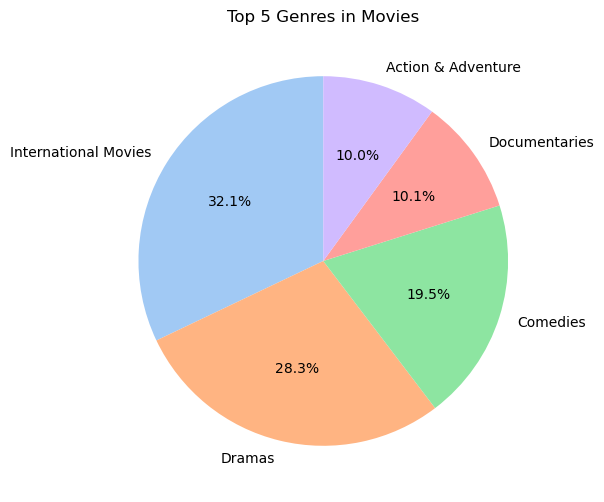

In [43]:
# Prepare top 5 genres for Movies
movie_genres = df[df['type'] == 'Movie']
movie_genres = movie_genres.assign(genre=movie_genres['genres'].str.split(', ')).explode('genre')
top5_movie_genres = movie_genres['genre'].value_counts().head(5)

# Plot pie chart
top5_movie_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=sns.color_palette('pastel'))
plt.title('Top 5 Genres in Movies')
plt.ylabel('')
plt.show()


# 🥧 Top 5 Genres for TV Shows – Pie Chart

In [44]:
tv_genres = df[df['type'] == 'TV Show']

In [45]:
tv_genres

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,<NA>,1
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,<NA>,9
17,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,<NA>,1
18,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,<NA>,2
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,<NA>,3
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,<NA>,1
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,<NA>,1


In [46]:
tv_genres.assign(genre= tv_genres['genres'].str.split(', '))

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons,genre
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1,"[Crime TV Shows, International TV Shows, TV Ac..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,<NA>,1,"[TV Dramas, TV Horror, TV Mysteries]"
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,<NA>,9,"[British TV Shows, Reality TV]"
17,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,<NA>,1,"[Docuseries, Reality TV]"
18,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,<NA>,1,"[British TV Shows, Crime TV Shows, Docuseries]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,<NA>,2,"[International TV Shows, TV Dramas]"
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,<NA>,3,[Kids' TV]
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,<NA>,1,"[International TV Shows, Romantic TV Shows, TV..."
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,<NA>,1,[Kids' TV]


In [47]:
tv_genres.assign(genre= tv_genres['genres'].str.split(', ')).explode('genre')

,type,title,director,country,date_added,release_year,rating,duration,genres,year_added,movie_duration_mins,tvshow_duration_seasons,genre
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1,Crime TV Shows
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1,International TV Shows
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,<NA>,1,TV Action & Adventure
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,<NA>,1,TV Dramas
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,<NA>,1,TV Horror
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,<NA>,1,International TV Shows
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,<NA>,1,Romantic TV Shows
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,<NA>,1,TV Dramas
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,<NA>,1,Kids' TV


In [48]:
tv_genres = tv_genres.assign(genre= tv_genres['genres'].str.split(', ')).explode('genre')

In [49]:
top5_tv_genres = tv_genres['genre'].value_counts().head(5)

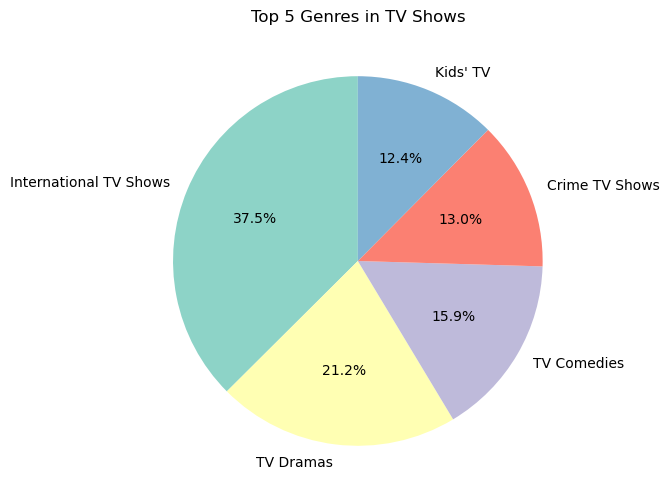

In [50]:
# Prepare top 5 genres for TV Shows
tv_genres = df[df['type'] == 'TV Show']
tv_genres = tv_genres.assign(genre=tv_genres['genres'].str.split(', ')).explode('genre')
top5_tv_genres = tv_genres['genre'].value_counts().head(5)

# Plot pie chart
top5_tv_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=sns.color_palette('Set3'))
plt.title('Top 5 Genres in TV Shows')
plt.ylabel('')
plt.show()


📝 Conclusion:

- The Movies pie chart shows dominant movie genres, often including Dramas, Action, Comedies, etc.

- The TV Shows pie chart often highlights genres like International TV, Kids’ TV, Reality Shows.

- This comparison reveals how content preferences differ between movies and TV shows on Netflix.

## 5 Ratings

# 5.1 - Content Rating Distribution — 📊 Count Plot + 🥧 Pie Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_3776\3689591445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')


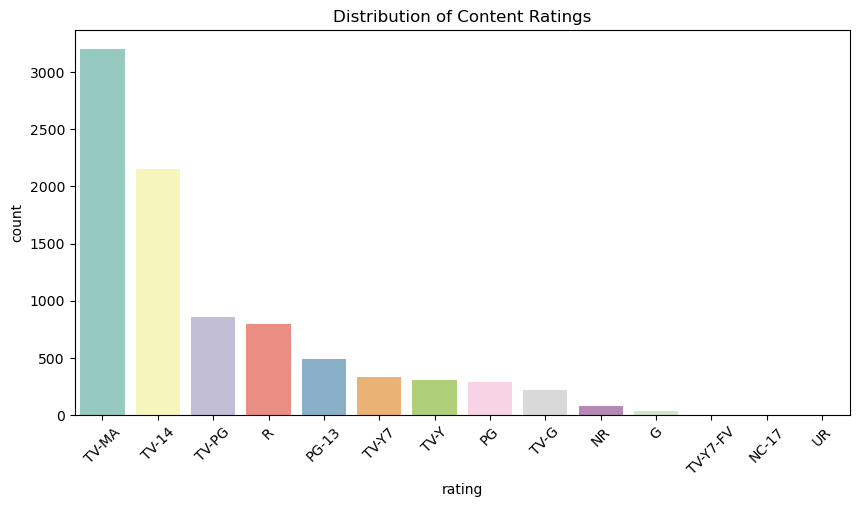

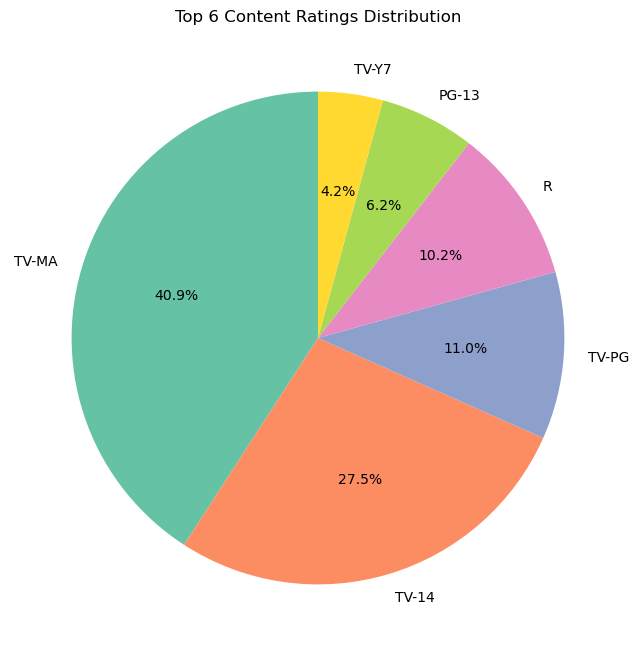

In [51]:
# Count plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribution of Content Ratings')
plt.show()

# Pie plot
plt.figure(figsize=(8, 8))
df['rating'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Top 6 Content Ratings Distribution')
plt.ylabel('')
plt.show()


📝 Conclusion: Shows target audience (e.g., more TV-MA = adult content). Pie chart helps visualize proportions easily.

# 5.2 - Ratings Over Time — 📈 Line Plot

<Figure size 1400x600 with 0 Axes>

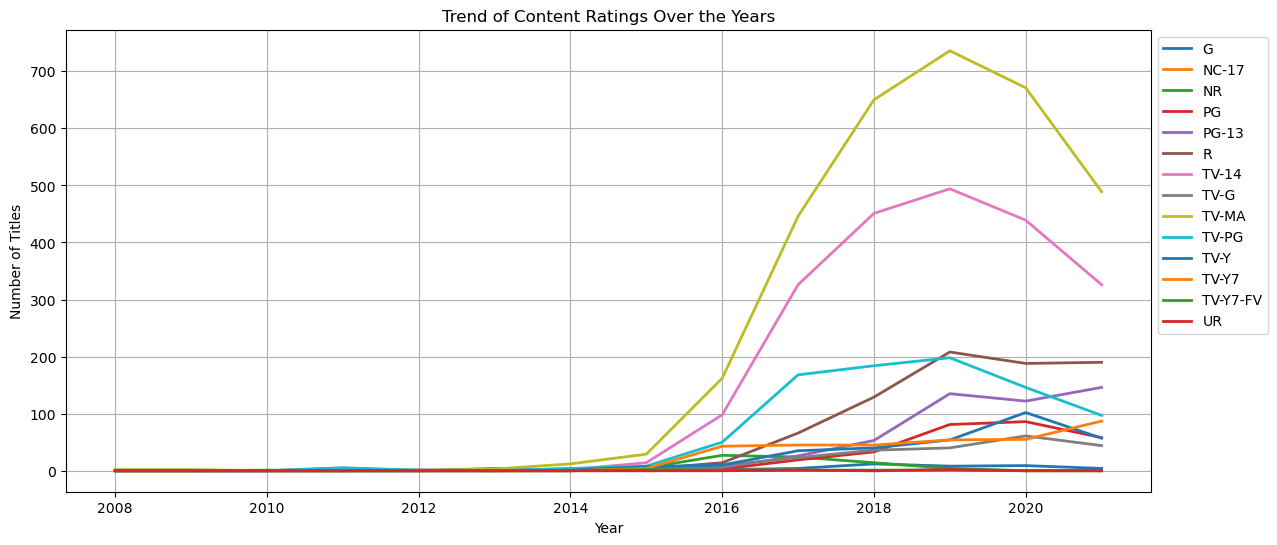

In [52]:
rating_year = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(14, 6))
rating_year.plot(figsize=(14,6), linewidth=2)
plt.title('Trend of Content Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


📝 Conclusion: Trends may show if Netflix is producing more mature (TV-MA) or family content over time.

# 6. Duration Distribution

# 6.1 - Average Duration of Movies — 📊 Histogram

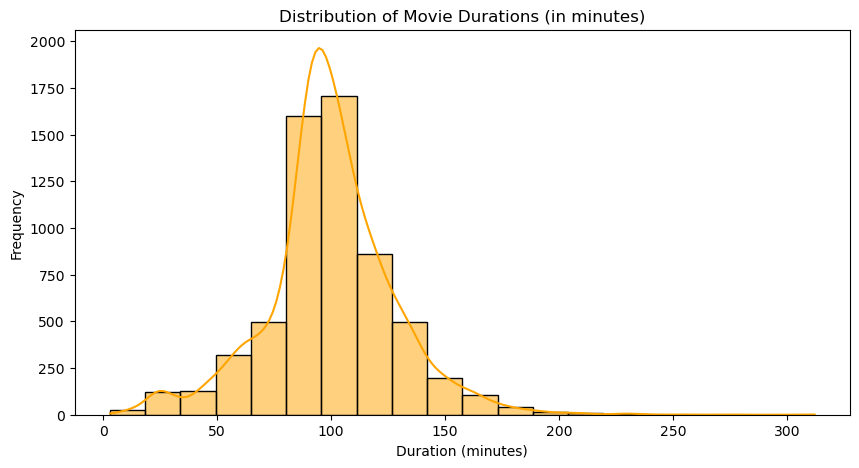

In [53]:

plt.figure(figsize=(10, 5))
sns.histplot(df['movie_duration_mins'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


📝 Conclusion: If most movies fall between 80–120 mins, Netflix sticks to standard lengths.

# 6.2 -   Average Seasons of TV Shows — 📊 Histogram

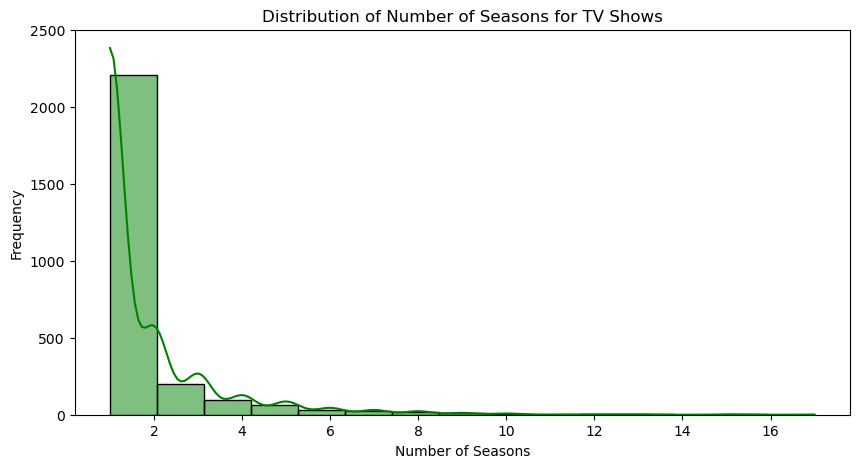

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tvshow_duration_seasons'], bins=15, kde=True, color='green')
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


📝 Conclusion: Most shows have 1–2 seasons. Indicates a trend toward mini-series or Netflix originals that end quickly.



# 7. Director Insights

# 7.1 Top 10 Directors — 📊 Bar Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_3776\300896398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')


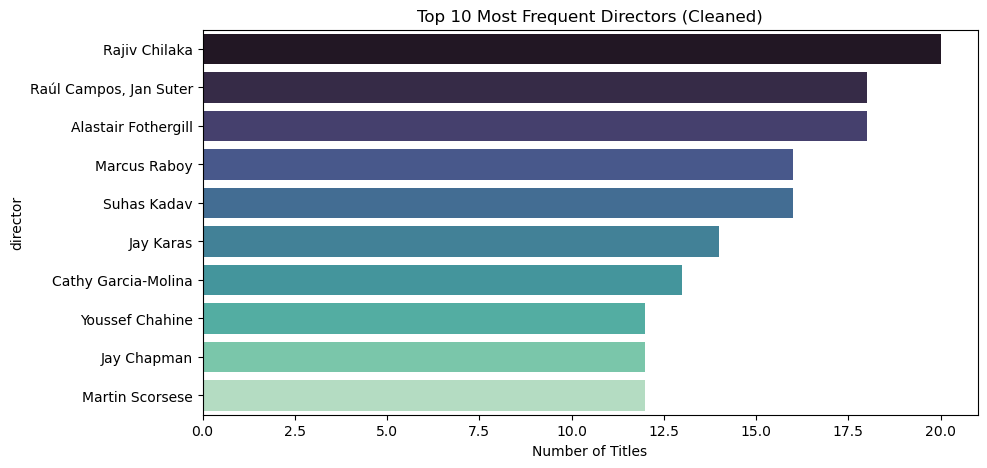

In [68]:
# Remove NaN, empty strings, and 'Not Given'
df_director_cleaned = df[~df['director'].isin(['', 'Not Given'])].dropna(subset=['director'])

# Top 10 directors
top_directors = df_director_cleaned['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title('Top 10 Most Frequent Directors (Cleaned)')
plt.xlabel('Number of Titles')
plt.show()


📝 Conclusion: Identifies the directors Netflix collaborates with most, showing content production trends.

📝 Conclusion: Reveals which directors specialize in TV content and possibly Netflix Originals.

# 7.2 - Director with Most TV Shows — 📊 Bar Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_3776\36248355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_directors.values, y=top_tv_directors.index, palette='viridis')


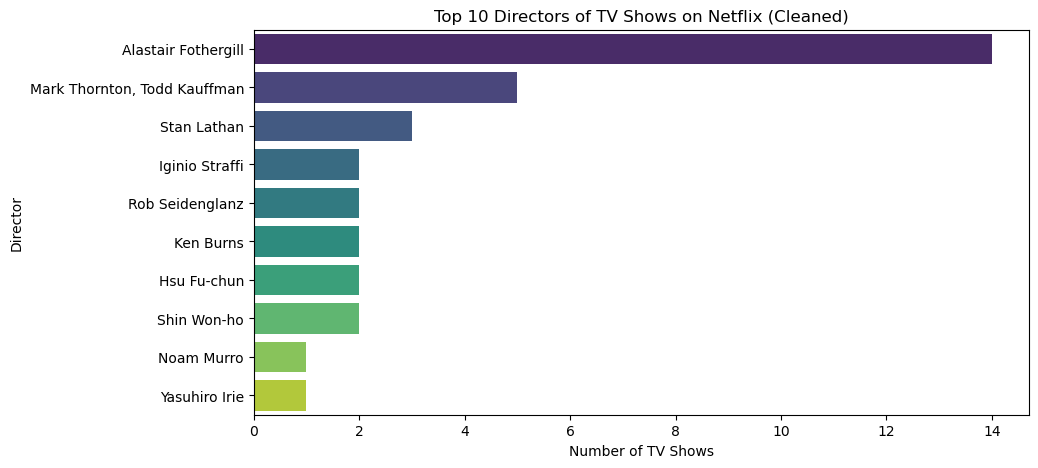

In [69]:
# Filter for only TV Shows
tv_df = df[df['type'] == 'TV Show']

# Remove NaN, empty strings, and 'Not Given' from director column
tv_director_cleaned = tv_df[~tv_df['director'].isin(['', 'Not Given'])].dropna(subset=['director'])

# Get top 10 directors
top_tv_directors = tv_director_cleaned['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tv_directors.values, y=top_tv_directors.index, palette='viridis')
plt.title('Top 10 Directors of TV Shows on Netflix (Cleaned)')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')
plt.show()


📝 Conclusion: Reveals which directors specialize in TV content and possibly Netflix Originals

---

## END